# FBDA LAB 5 (Purity+ DBSCAN)


## Lab instructions
1. Carefully read and follow all instructions.
2. You need to do all 3 tasks (attendance + Evaluation + Submission)
3. You can search the basics of python, concepts, and syntax online.
4. TA isn’t ment to resolve your PC or internet issues. TA is only here to guide you through lab.
5. No evaluation would be done after Lab’s timing. So, keep the track of time.
6. Do keep in mind that sharing the code, discussing it during lab or looking for online solution is highly unethical, and all actions would be considered as plagiarism.
7. Plagiarism will result in serious penalty
8. Not Eveluationg at your turn after 2PM could result in 0.

###### Instruction - rename this file as rollnumber_lab5; for example
###### 20l-1212_lab5

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.vq import whiten
from scipy.cluster.hierarchy import dendrogram
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
sns.set()

# Task1: 
Read the data from CSV files. Number of nodes equal to your roll number+100. drop the excess nodes from the dataframe randomly.

#### eg: 20l-1390= 1390 nodes
1390+10=1490

so if dataframe have 2000 nodes, i'll randomly pick 1212 nodes from it and then start the processing

###### rename the column names and also handle the index of pandas

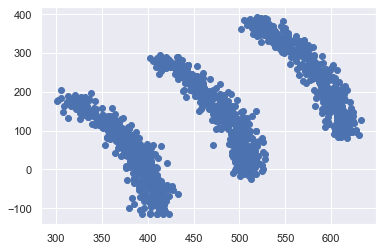

In [113]:
data1=pd.read_csv("C1.csv").sample(n=1213,replace=False)
data1.columns=['0','1','output']
plt.scatter(data1.iloc[:,0],data1.iloc[:,1]);

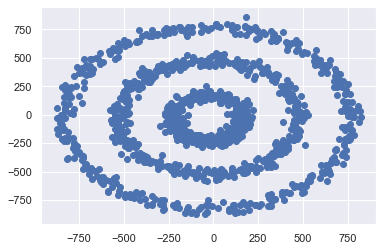

In [114]:
data2=pd.read_csv("L1.csv").sample(n=1213,replace=False)
data2.columns=['0','1','output']
plt.scatter(data2.iloc[:,0],data2.iloc[:,1]);

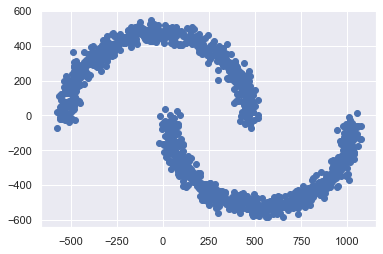

In [115]:
data3=pd.read_csv("P1.csv").sample(n=1213,replace=False)
data3.columns=['0','1','output']
plt.scatter(data3.iloc[:,0],data3.iloc[:,1]);

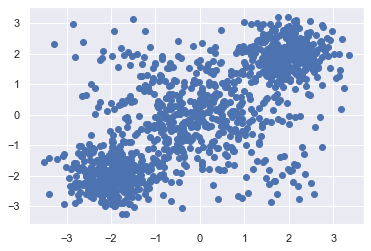

In [116]:
data4=pd.read_csv("S1.csv").sample(n=1213,replace=False)
data4.columns=['0','1','output']
plt.scatter(data4.iloc[:,0],data4.iloc[:,1]);

# Task2:
Merge all dataframes into 1 large csv file and then load data from that csv file.

###### hint: notice the columns name and its format

In [87]:
data=pd.concat([data1, data2, data3, data4], ignore_index=True,axis=1)
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,478.463645,144.787857,1.995054,-32.232159,-29.100298,2.005771,257.005229,-28.300210,0.497115,-0.046725,-0.018307,0.324815
std,87.848781,117.954620,0.814458,395.442226,392.930840,0.818999,450.094926,356.480999,0.500198,1.723257,1.730392,0.468499
min,301.770022,-124.383877,1.000000,-874.154203,-877.038322,1.000000,-575.660031,-585.544679,0.000000,-3.401101,-3.270619,0.000000
25%,402.289232,62.515679,1.000000,-277.086086,-270.775943,1.000000,-26.144721,-387.061738,0.000000,-1.701547,-1.705148,0.000000
50%,485.128763,144.375518,2.000000,-32.188120,-32.493419,2.000000,258.837564,-26.156694,0.000000,-0.098453,-0.035095,0.000000
75%,554.243634,232.213787,3.000000,204.849570,202.869108,3.000000,535.512718,325.592156,1.000000,1.651837,1.673986,1.000000
max,632.660542,404.494295,3.000000,823.867431,800.721309,3.000000,1073.849013,548.931984,1.000000,3.348112,3.206227,1.000000


In [88]:
# exporting as csv
data.to_csv('data.csv', index=False)

In [110]:
del data
data=pd.read_csv("data.csv")
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,478.463645,144.787857,1.995054,-32.232159,-29.100298,2.005771,257.005229,-28.300210,0.497115,-0.046725,-0.018307,0.324815
std,87.848781,117.954620,0.814458,395.442226,392.930840,0.818999,450.094926,356.480999,0.500198,1.723257,1.730392,0.468499
min,301.770022,-124.383877,1.000000,-874.154203,-877.038322,1.000000,-575.660031,-585.544679,0.000000,-3.401101,-3.270619,0.000000
25%,402.289232,62.515679,1.000000,-277.086086,-270.775943,1.000000,-26.144721,-387.061738,0.000000,-1.701547,-1.705148,0.000000
50%,485.128763,144.375518,2.000000,-32.188120,-32.493419,2.000000,258.837564,-26.156694,0.000000,-0.098453,-0.035095,0.000000
75%,554.243634,232.213787,3.000000,204.849570,202.869108,3.000000,535.512718,325.592156,1.000000,1.651837,1.673986,1.000000
max,632.660542,404.494295,3.000000,823.867431,800.721309,3.000000,1073.849013,548.931984,1.000000,3.348112,3.206227,1.000000


# Task3:
Standardize the data manually 

In [117]:
data['0']=(data['0']-data['0'].mean())/data['0'].std()
data['1']=(data['1']-data['1'].mean())/data['1'].std()
data['3']=(data['3']-data['3'].mean())/data['3'].std()
data['4']=(data['4']-data['4'].mean())/data['4'].std()
data['6']=(data['6']-data['6'].mean())/data['6'].std()
data['7']=(data['7']-data['7'].mean())/data['7'].std()
data['9']=(data['9']-data['9'].mean())/data['9'].std()
data['10']=(data['10']-data['10'].mean())/data['10'].std()

data.iloc[:,0]=data.iloc[:,0].replace(np.nan,data.iloc[:,0].mean())
data.iloc[:,1]=data.iloc[:,1].replace(np.nan,data.iloc[:,1].mean())

data.iloc[:,3]=data.iloc[:,3].replace(np.nan,data.iloc[:,3].mean())
data.iloc[:,4]=data.iloc[:,4].replace(np.nan,data.iloc[:,4].mean())
plt.scatter(data.iloc[:,3],data.iloc[:,]);


0       4.621081e-01
1       4.812055e-01
2       2.359217e-16
3       5.990711e-01
4       3.396743e-01
            ...     
1495   -1.864974e+00
1496   -2.052468e+00
1497    2.359217e-16
1498   -2.038276e+00
1499   -2.033272e+00
Name: 0, Length: 1500, dtype: float64


# Task4:
Print all the dendograms of dataset. then put a line at the point, that you think is most suitable.

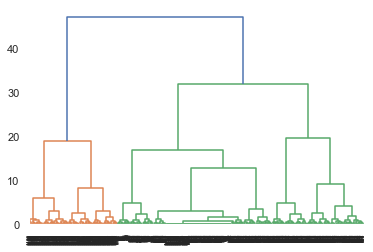

In [112]:
dn=dendrogram(linkage(data[['0','1']], method='ward', metric='euclidean'))

# Task5:

Apply Dbscan and calculate the purity on all datasets. For each dataset, you need to perform below steps

1. Estimate the number of neighbours and epsion. you must justify your findings through the elbow curve

2. State the time it take

3. Visualize it

4. State the purity of each cluster

Purity formula = (1/total nodes in cluster) * real node dominance in that cluster 

Compare the number of clusters formed by dbscan and the one you estimated by cutting dendogram. either dandogram is wrong or dbscan needs tuning. there are just so many possibiites. So state the final results in each case

##### NOTE: Printing result with default color pallete will result in 0 for that task. I need to see unique and distingushing colors

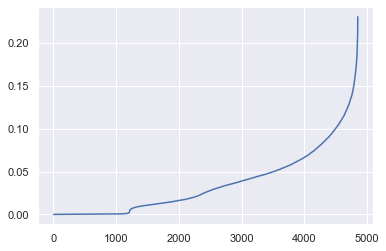

In [ ]:
neigh = NearestNeighbors(n_neighbors=7)
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)
distances = np.sort(distances, axis=0)
distances = [np.average(x) for  x in distances ]
plt.plot(distances)

DBSCAN(eps=0.15, min_samples=7)

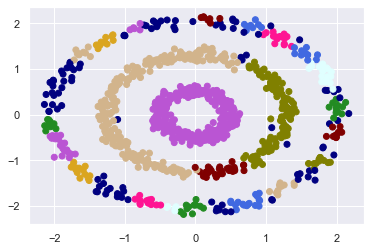

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24]


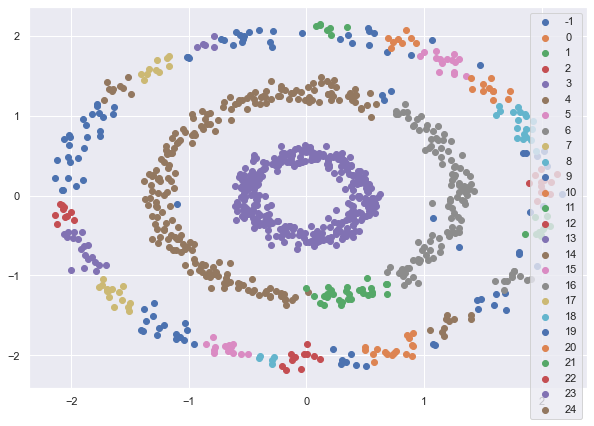

,0,1,output,0
1,519.554423,26.118181,2,1
127,741.153762,164.322391,1,1
156,-145.915617,121.588955,3,1
157,-5.800083,-263.209847,3,1
321,239.095831,668.375772,1,1
349,-47.644165,-870.487374,1,1
393,190.184688,-19.264390,3,1
397,121.204984,-37.816382,3,1
449,-368.060757,-747.511701,1,1
477,569.978178,497.641021,1,1


11

6

0.5454545454545454

#### Results:

this....